[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/labs/04%20-%20Pandas%20and%20Data%20Cleaning/Exercises/Solutions/exercise_01_sol_2025.ipynb)



# EDA and data visualization

## EXERCISE 1 - Solutions

In this exercise you're going to put in practice what you just learned and implement the same types of charts.<br>
Those charts will help you to answer questions.

For this, we're going to use the same data-set we used in the walkthroughs.<br>

***Beware ! You need to clean the data-set to be able to answer the questions ;)***

## 1. Imports, data set and cleaning

### 1.1 Imports

First, you have to import the libraries you wil need.

In [ ]:
# Don't forget to import seaborn and scatter_matrix
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Set some Pandas options
sns.set(style="darkgrid")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### 1.2 Load the data-set

Here is the url to retreive the data set : https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/Telco-Customer-Churn.csv




In [ ]:
# import data set
data_telco = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/Telco-Customer-Churn.csv")
data_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1.3 Converting column types


In [ ]:
# Take a look at the column types
data_telco.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
#Convert Total Charges to numeric, use error = 'coerce'
data_telco["TotalCharges"] = pd.to_numeric(data_telco["TotalCharges"], errors = 'coerce')

In [ ]:
# What columns can be converted to the categorical type?
# Convert 3 of them here
# For Example:

data_telco["gender"] = data_telco["gender"].astype("category")
data_telco["InternetService"] = data_telco["InternetService"].astype("category")
data_telco["PaymentMethod"] = data_telco["PaymentMethod"].astype("category")


### 1.4 Boolean values

Remeber that boolean values are either True or False. Use the `value_counts()` function to see what values compose the `seniorCitizen` column.

In [ ]:
data_telco["SeniorCitizen"].value_counts()

,count
SeniorCitizen,
0,5901
1,1142


If you did it right, you should see that the column is composed only of 0's and 1's. We could change the 1's for `True` and the 0's for `False`.

You can use the `astype` function for this, just pass 'bool' as an argument instead of 'category'.

What other columns can be converted to this type? Convert at least 3 of them.

In [ ]:
data_telco["SeniorCitizen"] = data_telco["SeniorCitizen"].astype("bool")
data_telco["Partner"] = data_telco["Partner"].astype("bool")
data_telco["Dependents"] = data_telco["Dependents"].astype("bool")

### 1.5 Cleaning the NaN value

Now since the data set contains NaN values, you will need to clean first before the Analysis.

In [ ]:
data_telco.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
data_telco_clean = data_telco.dropna()

##2. First analysis
**question:**
What is the proportion of women in our Data?

In [ ]:
values = data_telco_clean["gender"].value_counts()
proportion = values["Female"]/(values["Female"] + values["Male"])

print("Women account for {}% of our customers.".format(round(proportion*100,2 )))

Women account for 49.53% of our customers.


##3. Histogram

Now, plot an histogram of the `TotalCharges` column, use 20 bins.


<Axes: >

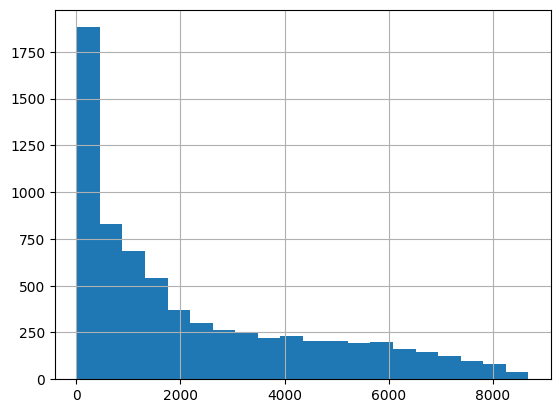

In [ ]:
data_telco_clean["TotalCharges"].hist(bins = 20)

##4. Boxplot

**Question:** What are the mean, median, min and the value of the third quartile of the `MonthlyCharges` and `TotalCharges` ?<br>

Plot both in one figure


<Axes: >

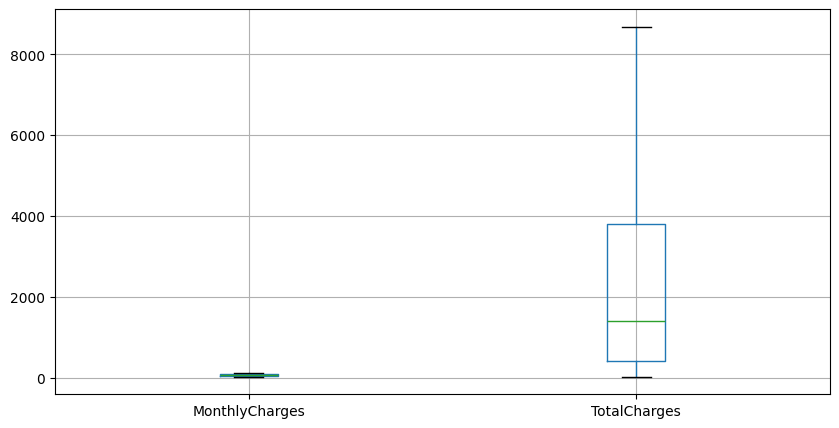

In [ ]:
#here for the visualization
data_telco_clean.boxplot(column = ["MonthlyCharges", "TotalCharges"], figsize = (10,5))

In [ ]:
#here for the numerical
data_telco_clean[["MonthlyCharges", "TotalCharges"]].describe()

,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000
mean,64.798208,2283.300441
std,30.085974,2266.771362
min,18.250000,18.800000
25%,35.587500,401.450000
50%,70.350000,1397.475000
75%,89.862500,3794.737500
max,118.750000,8684.800000


## 5. Scatter Plot and lines


### 5.1 Scatter plot
**Question:** Is there a correlation between the `MonthlyCharges` and the `TotalCharges` ?

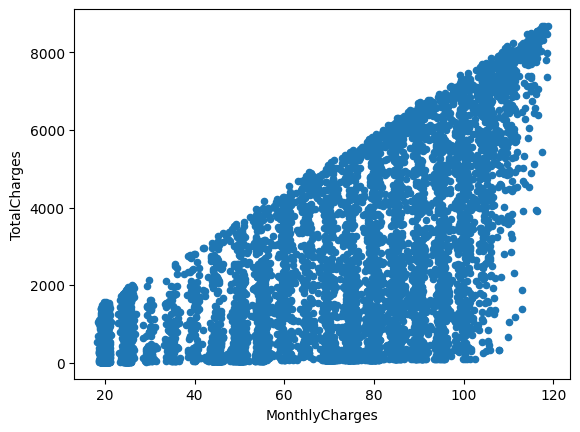

In [ ]:
scat = data_telco_clean.plot.scatter(x = "MonthlyCharges", y = "TotalCharges")

### 5.2 Pair Grid
**Question:** could you find any correlation between one of those values: `tenure`, `MonthlyCharges`, `TotalCharges` ?
 (Use scatterplot)

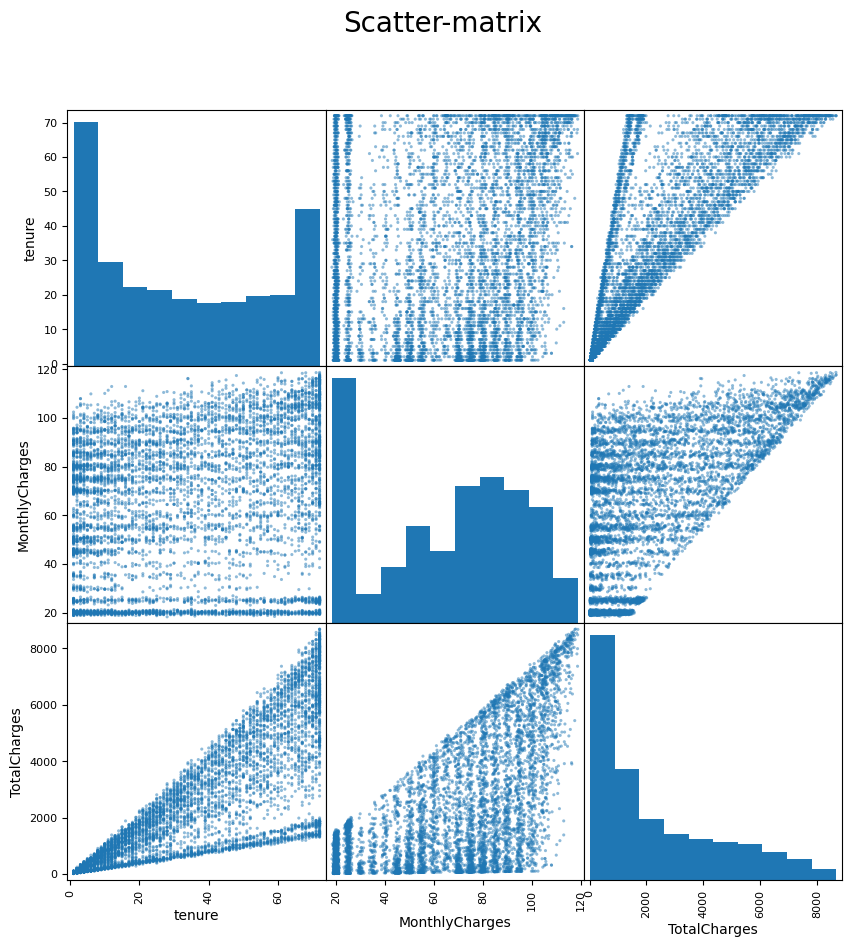

In [ ]:
scat2 = scatter_matrix(data_telco_clean[["tenure", "MonthlyCharges", "TotalCharges"]], figsize=(10, 10), grid=True, s = 20)
plt.suptitle('Scatter-matrix', size = 20)
plt.show()



## 6. Heatmap and correlations
Calculate the **correlation DataFrame**, and plot its **heatmap**. We have already processed and adapted the data for you, you just need to create a correlation matrix and plot the heatmap with `sns`.

<h2>Important: This heatmap helps answer the two-question quiz </h2>

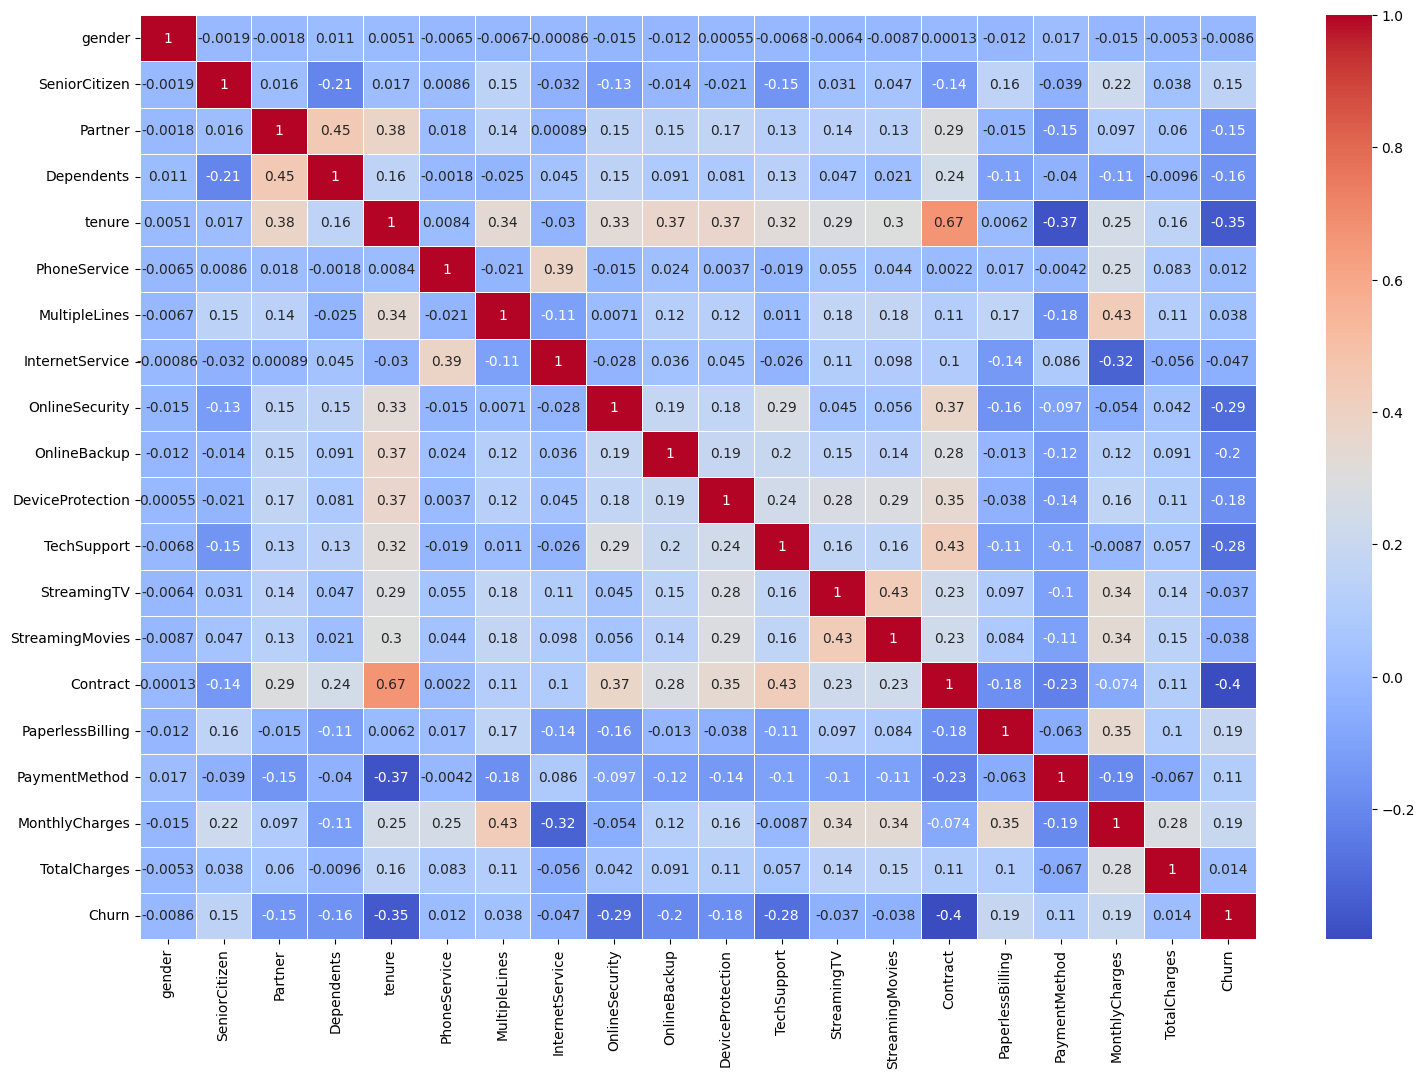

In [ ]:
# ⚠️ Do not modify this code, as it is required for consistency in data processing
data_telco = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/Telco-Customer-Churn.csv")
for col in data_telco.select_dtypes(include=['object']).columns:
    data_telco[col] = pd.Categorical(data_telco[col]).codes
data_telco.drop('customerID',axis=1,inplace=True)
plt.figure(figsize=(25, 12))


# Use the new DataFrame that we created just above and which is called "data_telco"
# Create the correlation DataFrame with "data_telco" and plot its heatmap
corr_matrix = data_telco.corr()
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

## 7. Plot the histogram with seaborn

Create two histograms to compare SeniorCitizen vs Churn and Gender vs Churn. You can use sns.countplot.

Tip: Use the "hue" parameter in sns.countplot() to differentiate the Churn categories within each SeniorCitizen and gender group.
If you have doubts, you can check the online documentation [here](https://seaborn.pydata.org/generated/seaborn.countplot.html?utm_source=chatgpt.com).

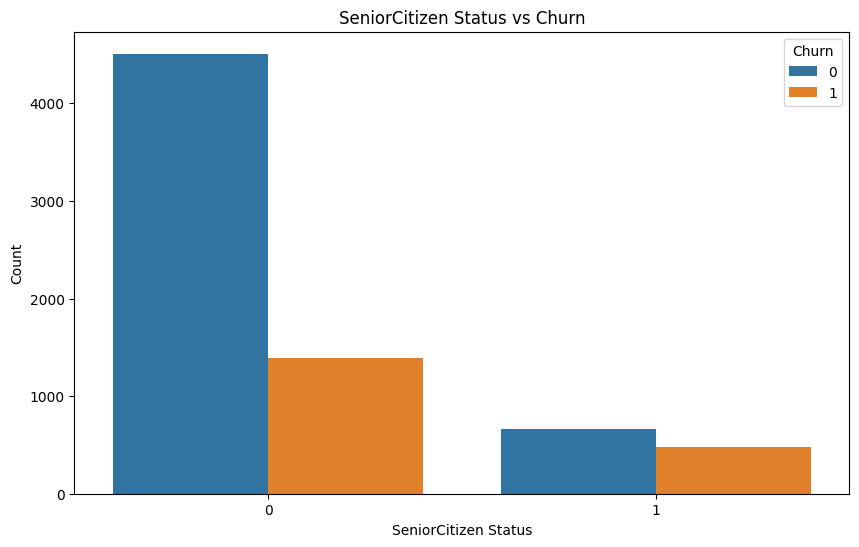

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_telco, x='SeniorCitizen', hue='Churn')

plt.title('SeniorCitizen Status vs Churn')
plt.xlabel('SeniorCitizen Status')
plt.ylabel('Count')
plt.show()

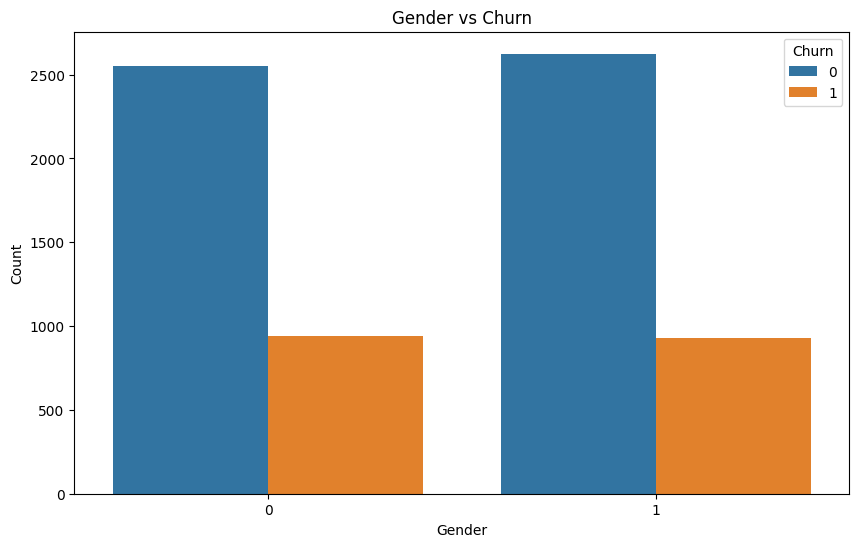

In [ ]:
plt.figure(figsize=(10, 6))
data_telco["gender"] = data_telco["gender"].astype("category")
sns.countplot(data=data_telco, x='gender', hue='Churn')

plt.title('Gender vs Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()